## Read data

In [17]:
import pandas as pd

In [18]:
weibo = pd.read_csv('./data/all_data.txt',sep='\t', names=['is_not_rumor','content'],encoding='utf-8')
weibo = weibo.dropna()#deleat empty entries
weibo.head()

,is_not_rumor,content
0,0,据说这是广东经典名菜：三叫。刚出生的老鼠仔，直接生吃！当筷子夹起来的时候老鼠仔会叫一声；沾酒...
1,0,让历史照进现实！
2,0,河北省审计厅厅长助理董建柱，正跟女部下偷欢，却被女部下的爱人堵在门外。情急之下，他冒险从女...
3,0,#微信收费标准# 在工信部，运营商双重压力下，小马哥最终没能顶住，微信收费将于7月1日开始，...
4,1,之前修小学的事，跟新浪四川的朋友商量时，力量有限，都已做好了长期抗战的心理准备。随后四川大学...


In [19]:
content = weibo.content.values.tolist() #transform the contect type from series to list

### Seperate sentences by words

In [20]:
import jieba

In [21]:
#The elements of list is the seperated post
content_S = []
for line in content:
    current_segment = jieba.lcut(line) #cut sentences into lists of word
    if len(current_segment) > 1 and current_segment != '\r\n':
        content_S.append(current_segment)

In [22]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[据说, 这是, 广东, 经典, 名菜, ：, 三叫, 。, 刚出生, 的, 老鼠, 仔, ..."
1,"[让, 历史, 照进, 现实, ！]"
2,"[ , 河北省, 审计, 厅, 厅长, 助理, 董建柱, ，, 正, 跟, 女, 部下, 偷..."
3,"[#, 微信, 收费, 标准, #, , 在, 工信部, ，, 运营商, 双重, 压力, ..."
4,"[之前, 修, 小学, 的, 事, ，, 跟, 新浪, 四川, 的, 朋友, 商量, 时, ..."


## Deleat stopwords

In [23]:
stopwords=pd.read_csv("./stopwords/stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head()

,stopword
0,!
1,""""
2,#
3,$
4,%


In [24]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

In [25]:
df_content_clean=pd.DataFrame({'contents_clean':contents_clean})
df_content_clean.head()

,contents_clean
0,"[这是, 广东, 经典, 名菜, 三叫, 刚出生, 老鼠, 仔, 生吃, 筷子, 夹起来, ..."
1,"[历史, 照进, 现实]"
2,"[ , 河北省, 审计, 厅, 厅长, 助理, 董建柱, 正, 女, 部下, 偷欢, 女, ..."
3,"[微信, 收费, 标准, , 工信部, 运营商, 双重, 压力, 小马哥, 最终, 顶住,..."
4,"[修, 小学, 事, 新浪, 四川, 朋友, 商量, 力量, 有限, 做好, 长期抗战, 心..."


In [26]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,这是
1,广东
2,经典
3,名菜
4,三叫


## Calaulate word frequency and draw word cloud

In [27]:
word_counts = df_all_words['all_words'].value_counts().to_dict()
df_all_words['count'] = df_all_words['all_words'].map(word_counts)
df_all_words.drop_duplicates(['all_words'], inplace=True)
df_all_words.head()

,all_words,count
0,这是,884
1,广东,135
2,经典,144
3,名菜,40
4,三叫,40


In [28]:
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

%matplotlib inline

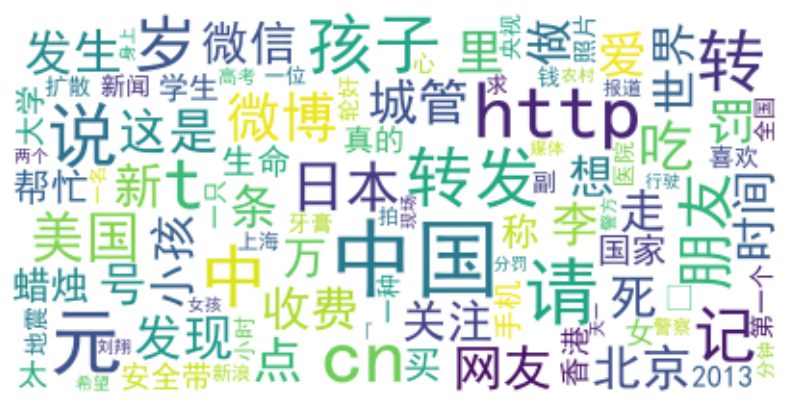

In [36]:
df_all_words['count'] = df_all_words['all_words'].map(word_counts)
df_all_words.drop_duplicates(['all_words'], inplace=True)

wordcloud = WordCloud(
    font_path="./data/simhei.ttf",
    background_color="white",
    max_font_size=80
)

word_frequence = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:100])

wordcloud = wordcloud.generate_from_frequencies(word_frequence)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bayes classifier

In [37]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':weibo['is_not_rumor']})
df_train.tail()

,contents_clean,label
17846,"[说, 微博, 草根, 大号, 营销, 账号, 日常, 维护, 民意, 粘合, 粉丝, 想,...",0
17847,"[端午, 拍摄, 粽子, 吃, 月明星稀, 远去, 红河, 清晰, 2300, 年前, 身影...",1
17848,"[傻, 逼, 看贞子]",0
17849,"[孙杨, 后嫩模, 女友, 曝光, 昨日, 八卦, 周刊, 微博, 爆出, 孙杨, 后嫩模,...",0
17850,"[女单, 神般, 记录, 重现, 2011, 世界, 乒乓球, 单项, 锦标赛, 中国队, ...",1


### Use CountVectorizer for word embedding

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [39]:
x_train[-1]

['收拾',
 '旧物',
 '翻到',
 '年前',
 '日记',
 '殴西',
 '思无邪',
 '时光',
 '恶心',
 '文字',
 '写',
 '矫揉造作',
 '字',
 '娘',
 '看着',
 '吓人',
 'bed',
 '凌乱',
 '殴西',
 '这是',
 '不堪回首',
 '青葱',
 '岁月',
 'bed',
 '奔跑']

In [40]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[-1]  

'收拾 旧物 翻到 年前 日记 殴西 思无邪 时光 恶心 文字 写 矫揉造作 字 娘 看着 吓人 bed 凌乱 殴西 这是 不堪回首 青葱 岁月 bed 奔跑'

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
#create dictionaryfor all words in words
vec.fit(words)

CountVectorizer(lowercase=False, max_features=4000)

In [43]:
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB()

In [44]:
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[1]

'患癌 咳出 肿瘤 痊愈   申 吉尼斯 纪录 英 一名 吃药时 狂咳 咳出 约 厘米 长 肿瘤 组织 医生 说 肿瘤 咳出 存活 几率 超过 五成 医生 说 掉 癌症 恭喜 申请 吉尼斯世界纪录 世界 首个 咳出 完整 肿瘤 组织'

In [45]:
classifier.score(vec.transform(test_words), y_test)

0.8951377996863097

### Use TfidfVectorizer for word embedding

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(lowercase=False, max_features=4000)

In [47]:
classifier1 = MultinomialNB()
classifier1.fit(vectorizer.transform(words), y_train)

MultinomialNB()

In [48]:
classifier1.score(vectorizer.transform(test_words), y_test)

0.9070132198073045